In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset("iris")

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     sepal_size  petal_size  
0         17.85        0.28  
1         14.70        0.28  
2         15.04        0.26  
3         14.26

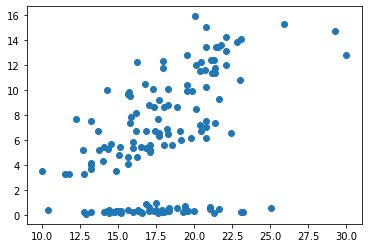

In [2]:
iris['sepal_size'] = iris['sepal_length'] * iris['sepal_width']

iris['petal_size'] = iris['petal_length'] * iris['petal_width']

print(iris)

plt.scatter(iris['sepal_size'], iris['petal_size'])

plt.show()

In [3]:
def normalization(src, maxs = np.nan, mins = np.nan) :
    
    if(maxs is np.nan) : maxs = src.max()
    
    if(mins is np.nan) : mins = src.min()
    
    dst = (src - mins) / (maxs - mins)
    
    return dst

In [4]:
import Kmeans

KMS = Kmeans.Kmeans(3, 2)

biKMS = Kmeans.biKmeans(3, 2)


In [5]:
data_X = normalization(iris['petal_length'])

data_Y = normalization(iris['petal_width'])

data_Species = iris['species'].replace('setosa', 0).replace('versicolor', 1).replace('virginica', 2)

data = np.array([np.array([a, b]) for a, b in zip(data_X, data_Y)])

It reaches to 0
SSE:[1.0461457300210988, 0.6167775287005767, 0.13693248467873215]
It reaches to 2
SSE:[0.8900414153021163, 0.6822266869354273, 0.13693248467873215]
It reaches to 2
SSE:[0.8858123226982189, 0.6791298808151454, 0.13693248467873215]
It reaches to 6
SSE:[0.8858123226982189, 0.6791298808151454, 0.13693248467873215]
Had been iterated to 3


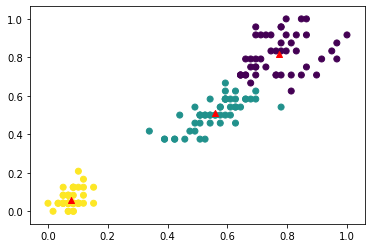

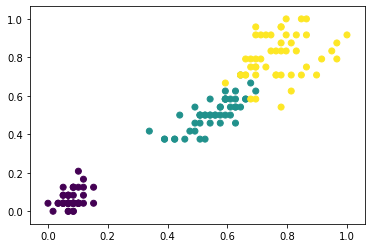

In [6]:
KMS.fit(data, maxIter = 100, distance = KMS.Distance.Euclidean, debug = 1)


plt.scatter(data[:, 0], data[:, 1], c = KMS.classify(data))

plt.scatter(KMS.collective[:, 0], KMS.collective[:, 1], marker = '^', c = '#ff0000')

plt.show()

plt.scatter(data[:, 0], data[:, 1], c = data_Species)

plt.show()

Collective:[[0.63753899 0.7428913 ]]
SSE:[44.87721422815865]
changer:0
data_Class:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
stage:1
Temp:[[0.07830508 0.06083333]
 [0.6620339  0.65666667]]
Collective:[[0.07830508 0.06083333]
 [0.6620339  0.65666667]]
SSE:[44.87721422815865]
changer:0
data_Class:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

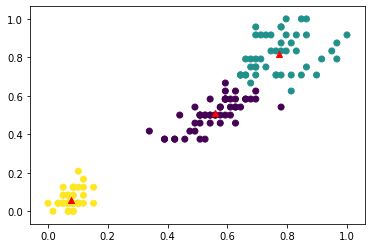

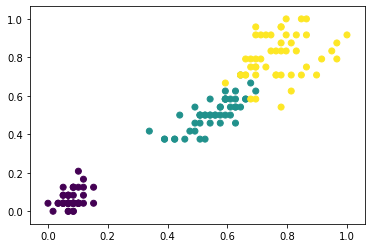

In [7]:
biKMS.fit(data, maxIter = 100, distance = KMS.Distance.Euclidean, debug = 1)

plt.scatter(data[:, 0], data[:, 1], c = biKMS.classify(biKMS.collective, data))

plt.scatter(biKMS.collective[:, 0], biKMS.collective[:, 1], marker = '^', c = '#ff0000')

plt.show()

plt.scatter(data[:, 0], data[:, 1], c = data_Species)

plt.show()